# Import circos Module

In [1]:
from circos import CircosPlot
import xlrd
import pandas as pd
import numpy as np
%matplotlib inline

# Load the File of Medication Data Table from FDA Website

In [2]:
#Load the File
filename='.\\MedicationInteraction.xlsx'
book=xlrd.open_workbook(filename)
print('File loaded!')

File loaded!


# Extract Data

In [3]:
nrows = book.sheet_by_name('Sheet1').nrows

In [4]:
header = book.sheet_by_name('Sheet1').row_values(0)
data = [book.sheet_by_name('Sheet1').row_values(i) for i in range(1, nrows)]
df = pd.DataFrame(data, columns = header)

In [5]:
df[df == ''] = np.nan

In [6]:
df

,CYP1A2,CYP2B6,CYP2C8,CYP2C9,CYP2C19,CYP2D6,CYP2E1,CYP3A4
0,clozapine,artemisinin,paclitaxel,diclofenac,esomeprazole,carvedilol,enflurane,clarithromycin
1,cyclobenzaprine,bupropion,torsemide,ibuprofen,lansoprazole,S-metoprolol,halothane,erythromycin
2,duloxetine,cyclophosphamide,amodiaquine,naproxen,omeprazole,propafenone,isoflurane,telithromycin
3,fluvoxamine,efavirenz,cerivastatin,piroxicam,pantoprazole,timolol,methoxyflurane,quinidine
4,haloperidol,ifosfamide,repaglinide,tolbutamide,diazepam,amitriptyline,sevoflurane,alprazolam
5,imipramine,ketamine,NaN,glipizide,phenytoin,clomipramine,acetaminophen,diazepam
6,mexiletine,meperidine,NaN,glyburide,phenobarbitone,desipramine,benzene,midazolam
7,nabumetone,methadone,NaN,losartan,amitriptyline,duloxetine,chlorzoxazone,triazolam
8,naproxen,nevirapine,NaN,irbesartan,carisoprodol,fluoxetine,ethanol,cyclosporine
9,olanzapine,propofol,NaN,celecoxib,citalopram,imipramine,theophylline,tacrolimus


# Data Munging

In [7]:
df_dict = {}
for i in range(len(df.columns)):
    df_dict[df.icol(i).name] = list(df.icol(i).dropna())

## Nodes

In [8]:
nodes = []
for key in df_dict.keys():
    nodes.extend(df_dict[key])
    #nodes.extend(['0']*3)

In [9]:
nodes = list(nodes)

In [10]:
headers = list(df.columns)

In [11]:
enzymes = ['0'] * 5
for header in headers:
    enzymes.append(header)
    enzymes.extend(['0']*5)

In [12]:
nodes.extend(enzymes)

## Edges

In [13]:
edges_origin = []
for key in df_dict.keys():
    for value in df_dict[key]:
        edges_origin.append((key, value))

In [14]:
#nodeprops = dict(facecolor='green', alpha=1)
#edgeprops = dict(edgecolor='red', alpha=1, ls='--')

# Plotting the All-in-one Circos

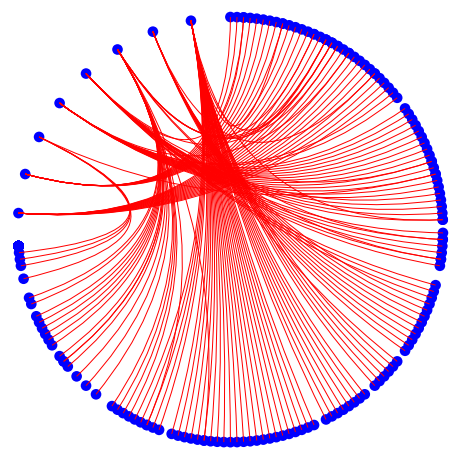

In [15]:
c = CircosPlot(nodes, edges_origin, radius = 10, 
              nodecolor="blue",
              edgecolor="red",
              )
c.draw()

# Build Drug Circos Plotting Corresponding Enzymes

## CYP1A2

In [16]:
edges = []
for value in df_dict['CYP1A2']:
    edges.append(('CYP1A2', value))

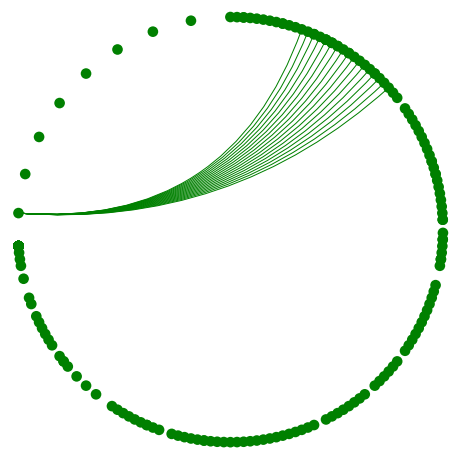

In [17]:
c = CircosPlot(nodes, edges, radius = 10, 
              nodecolor="green",
              edgecolor="green",
              )
c.draw()

## CYP2B6

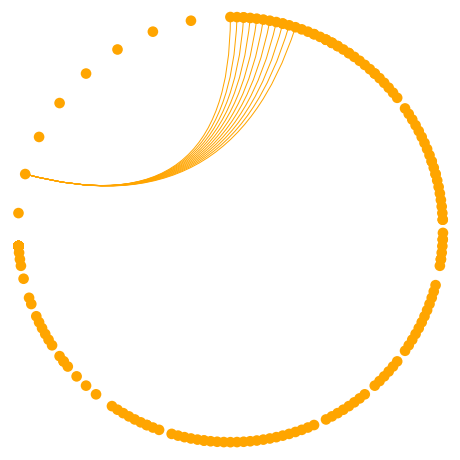

In [18]:
edges = []
for value in df_dict['CYP2B6']:
    edges.append(('CYP2B6', value))
    
c = CircosPlot(nodes, edges, radius = 10, 
              nodecolor="orange",
              edgecolor="orange",
              )
c.draw()

## CYP2C8

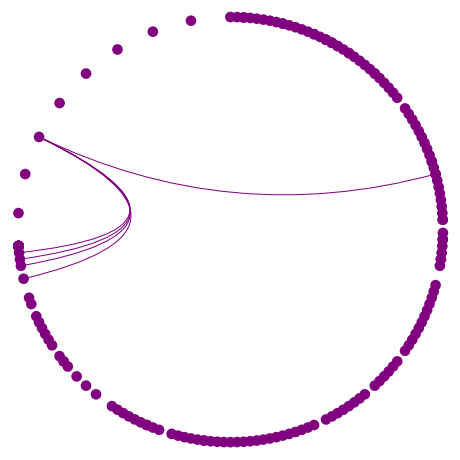

In [19]:
edges = []
for value in df_dict['CYP2C8']:
    edges.append(('CYP2C8', value))
    
c = CircosPlot(nodes, edges, radius = 10, 
              nodecolor="purple",
              edgecolor="purple",
              )
c.draw()

## CYP2C9

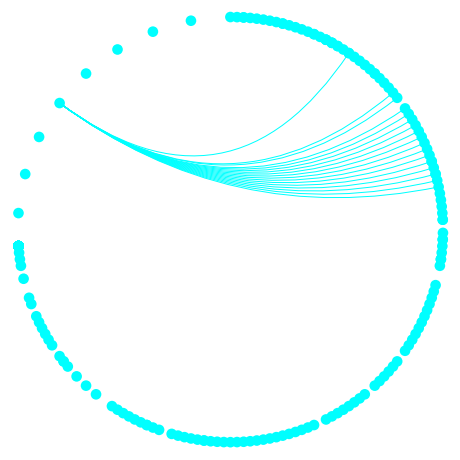

In [20]:
edges = []
for value in df_dict['CYP2C9']:
    edges.append(('CYP2C9', value))
    
c = CircosPlot(nodes, edges, radius = 10, 
              nodecolor="cyan",
              edgecolor="cyan",
              )
c.draw()

## CYP2C19

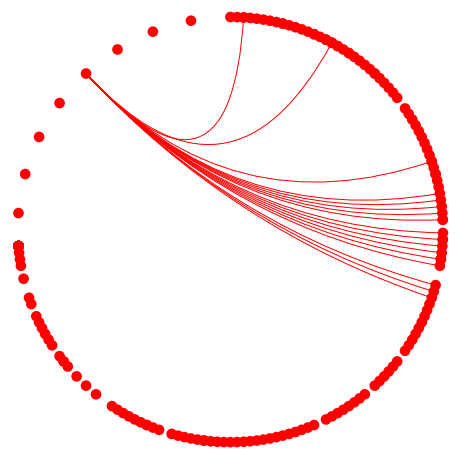

In [21]:
edges = []
for value in df_dict['CYP2C19']:
    edges.append(('CYP2C19', value))
    
c = CircosPlot(nodes, edges, radius = 10, 
              nodecolor="red",
              edgecolor="red",
              )
c.draw()

## CYP2D6

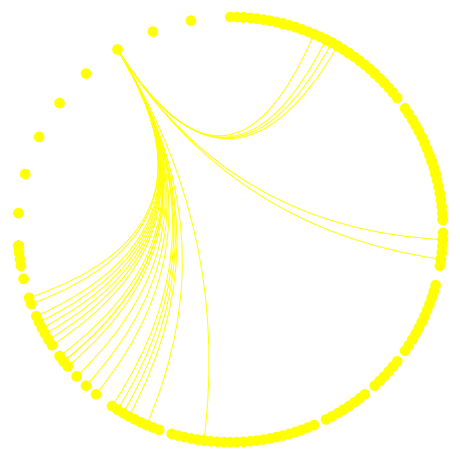

In [22]:
edges = []
for value in df_dict['CYP2D6']:
    edges.append(('CYP2D6', value))
    
c = CircosPlot(nodes, edges, radius = 10, 
              nodecolor="yellow",
              edgecolor="yellow",
              )
c.draw()

## CYP2E1

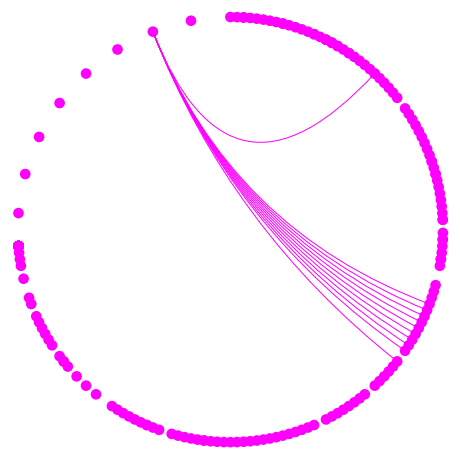

In [23]:
edges = []
for value in df_dict['CYP2E1']:
    edges.append(('CYP2E1', value))
    
c = CircosPlot(nodes, edges, radius = 10, 
              nodecolor="magenta",
              edgecolor="magenta",
              )
c.draw()

## CYP3A4

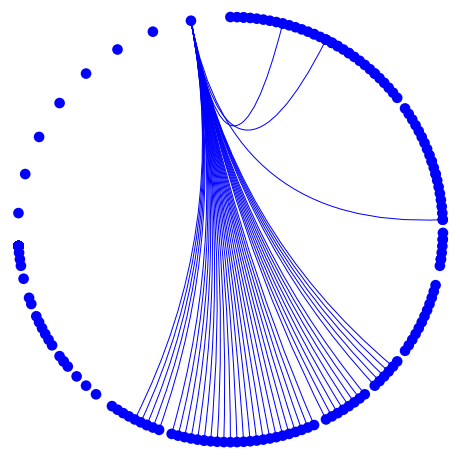

In [24]:
edges = []
for value in df_dict['CYP3A4']:
    edges.append(('CYP3A4', value))
    
c = CircosPlot(nodes, edges, radius = 10, 
              nodecolor="blue",
              edgecolor="blue",
              )
c.draw()

# Pick up 14 Specific Medications

They are propafenone（心律平）, acetaminophen（对乙酰氨基酚）, paclitaxel（紫杉醇）, ibuprofen（布洛芬）, losartan（洛沙坦）, omeprazole（奥美拉唑）, carvediolo（卡维地洛）, codeine（可待因）, theophylline（茶碱）, quinidine（奎尼丁）, verapamil（异搏定）, lovastatin（洛伐他汀）, nitrendipine（尼群地平）.

In [25]:
medications = ['propafenone', 'acetaminophen', 'paclitaxel', 'ibuprofen', 'losartan', 
               'omeprazole', 'carvedilol', 'codeine', 'theophylline', 'quinidine', 'verapamil', 
               'lovastatin', 'nitrendipine']
edges_candidate = set()

for medication in medications:
    for edge in edges_origin:
        if medication == edge[1]:
            edges_candidate.add(edge)
edges_candidate = list(edges_candidate)    
    

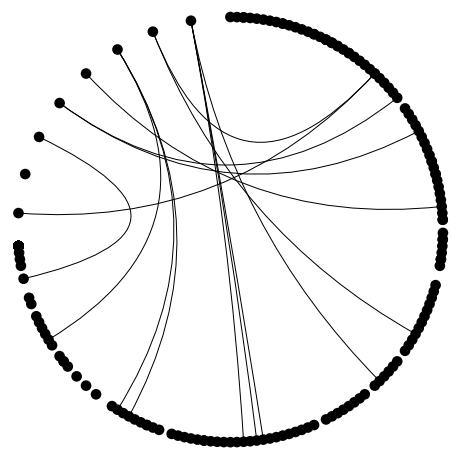

In [26]:
c = CircosPlot(nodes, edges_candidate, radius = 10, 
              nodecolor="black",
              edgecolor="black",
              )
c.draw()